<a href="https://colab.research.google.com/github/Priyanshu27083/ML_lab/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees on Pimas Indian diabetes Dataset

In [25]:
#Splitting
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
data = pd.read_csv('/content/diabetes.csv')

# Introduce some missing values artificially for demo
import numpy as np
data.loc[data.sample(frac=0.1).index, 'Glucose'] = np.nan

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data.drop('Outcome', axis=1))
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)
y_pred = baseline_dt.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)

print("Baseline Accuracy:", baseline_acc)


Baseline Accuracy: 0.7337662337662337


Original features shape: (768, 8)
PCA-transformed features shape: (768, 5)

Default Decision Tree Test Accuracy (on PCA data): 0.6623
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Tuned Decision Tree Test Accuracy (on PCA data): 0.7273


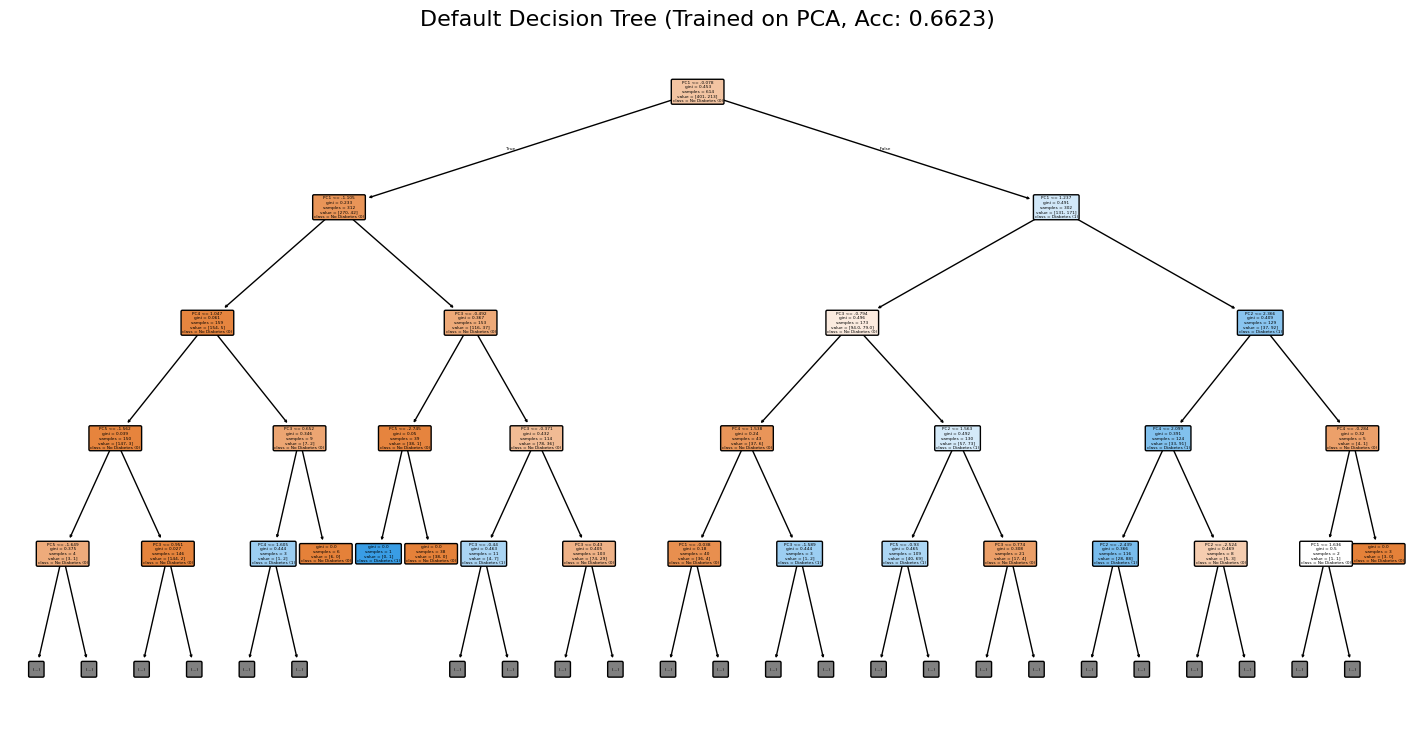

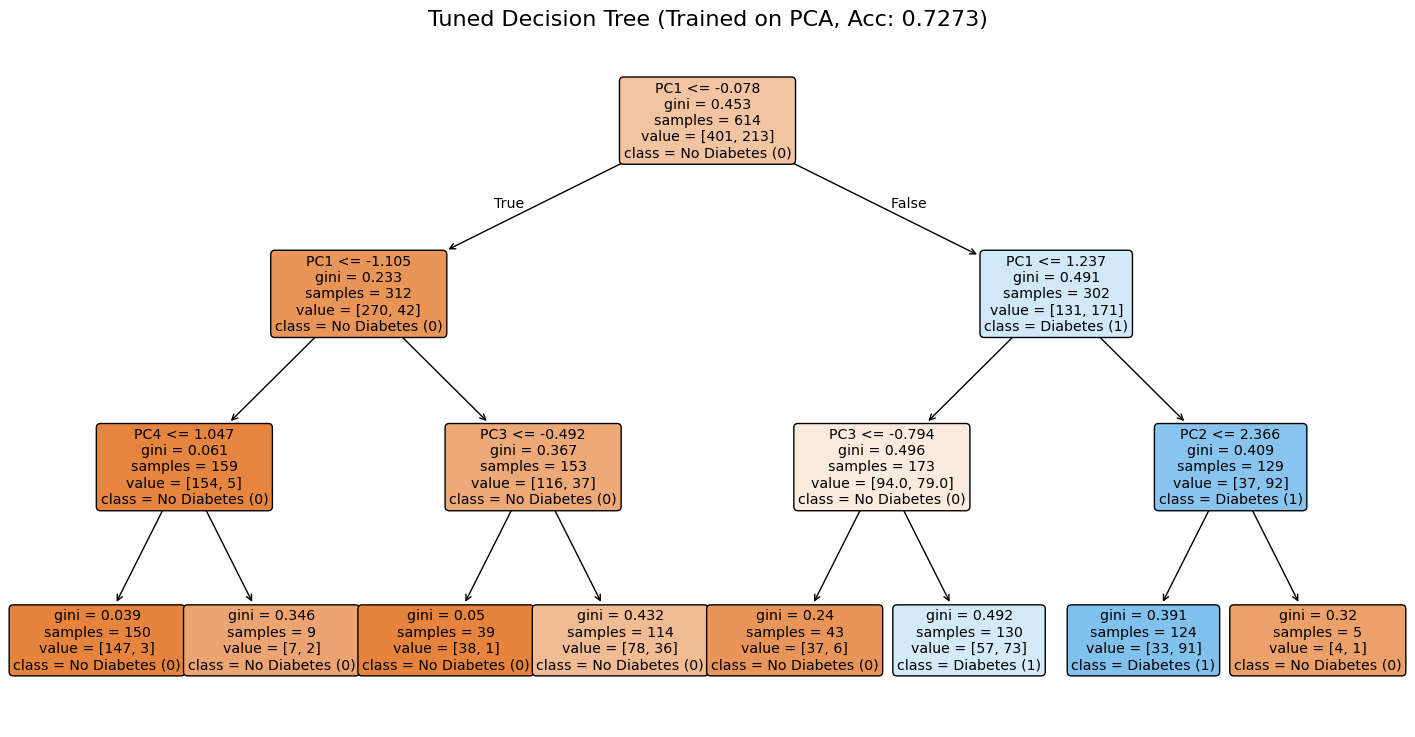

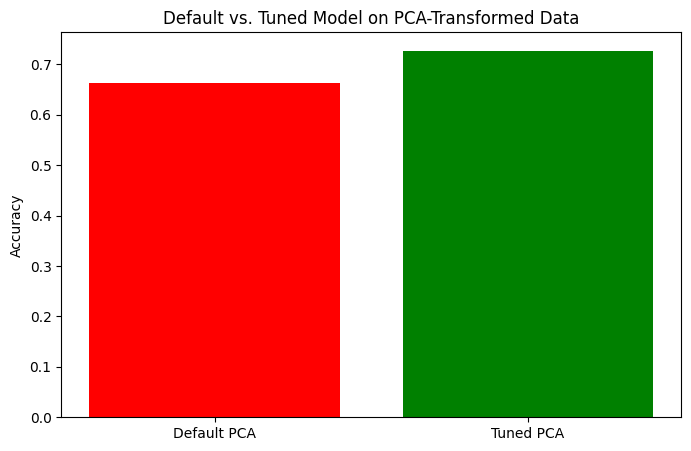

In [31]:
#Hyperparameter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
feature_names_original = X.columns.tolist()
class_names = ['No Diabetes (0)', 'Diabetes (1)']

# --- 2. Missing Value Handling (Imputation) ---
# In the Pima dataset, 0s often represent missing values for:
# Glucose, BloodPressure, SkinThickness, Insulin, and BMI.
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X_impute = X.copy()
X_impute[cols_to_impute] = X_impute[cols_to_impute].replace(0, np.nan)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_impute)
X_imputed = pd.DataFrame(X_imputed, columns=feature_names_original)

# --- 3. Standardize and Apply PCA ---
# Standardize the imputed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA (e.g., reduce to 5 components, adjust based on explained variance)
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Original features shape: {X.shape}")
print(f"PCA-transformed features shape: {X_pca.shape}")

# --- 4. Train/Test Split (Using X_pca as requested) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# --- 5. Baseline Model (Untuned) ---
# This is the 'before' model
default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)

# Calculate its accuracy on the test set
y_pred_default = default_tree.predict(X_test)
default_acc = accuracy_score(y_test, y_pred_default)
print(f"\nDefault Decision Tree Test Accuracy (on PCA data): {default_acc:.4f}")

# --- 6. Hyperparameter Tuning (Extended param_grid) ---
param_grid = {
    # The extended parameter grid including 'splitter'
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)
tuned_acc = accuracy_score(y_test, y_pred_tuned)

print(f"Best parameters: {grid.best_params_}")
print(f"Tuned Decision Tree Test Accuracy (on PCA data): {tuned_acc:.4f}")

# --- 7. Visualization: Decision Trees and Accuracy Comparison ---

# Feature names for visualization must be the PCA components
pca_feature_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]

## Decision Tree before tuning (Default Tree)
plt.figure(figsize=(18, 9))
plot_tree(
    default_tree,
    filled=True,
    feature_names=pca_feature_names,
    class_names=class_names,
    rounded=True,
    max_depth=4 # Limit depth for clear visualization
)
plt.title(f"Default Decision Tree (Trained on PCA, Acc: {default_acc:.4f})", fontsize=16)
plt.show()

## Decision Tree after tuning (Best Model)
plt.figure(figsize=(18, 9))
plot_tree(
    best_model,
    filled=True,
    feature_names=pca_feature_names,
    class_names=class_names,
    rounded=True,
    max_depth=3 # Limit depth for clear visualization
)
plt.title(f"Tuned Decision Tree (Trained on PCA, Acc: {tuned_acc:.4f})", fontsize=16)
plt.show()

# --- 8. Accuracy Comparison ---
plt.figure(figsize=(8, 5))
plt.bar(['Default PCA', 'Tuned PCA'],
        [default_acc, tuned_acc],
        color=['red', 'green'])
plt.ylabel('Accuracy')
plt.title('Default vs. Tuned Model on PCA-Transformed Data')
plt.show()

## A **hyperparameter** is a setting that the machine learning engineer, must choose and set manually before the model starts training. I have used different parameters like criterion, splitter, max_depth, min_samples_split

PCA Accuracy: 0.6753246753246753
Baseline acc 0.7337662337662337


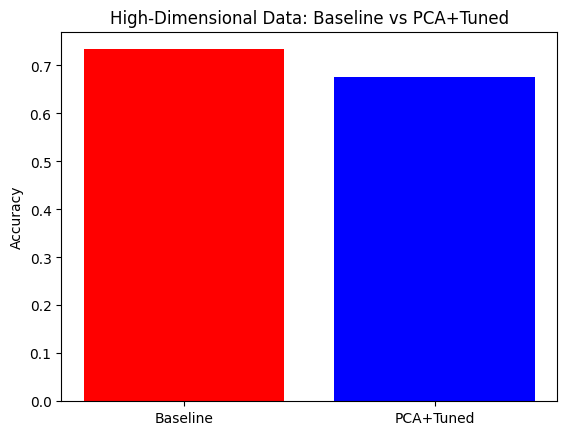

In [27]:
#Scalability and High-Dimensional data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Split & tune
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
grid.fit(X_train, y_train)
best_dt_pca = grid.best_estimator_
y_pred = best_dt_pca.predict(X_test)
pca_acc = accuracy_score(y_test, y_pred)

print("PCA Accuracy:", pca_acc)
print("Baseline acc", baseline_acc)
# Visual Comparison
plt.bar(['Baseline','PCA+Tuned'], [baseline_acc, pca_acc], color=['red','blue'])
plt.ylabel('Accuracy')
plt.title('High-Dimensional Data: Baseline vs PCA+Tuned')
plt.show()

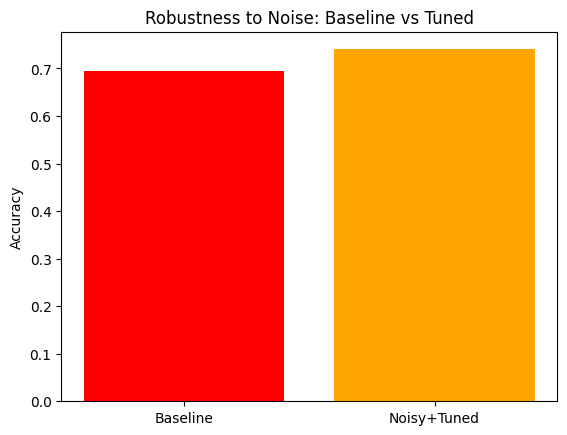

In [21]:
# Add noise
X_noisy = X + np.random.normal(0,10,X.shape)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
grid.fit(X_train, y_train)
best_dt_noisy = grid.best_estimator_
y_pred = best_dt_noisy.predict(X_test)
noisy_acc = accuracy_score(y_test, y_pred)

plt.bar(['Baseline','Noisy+Tuned'], [baseline_acc, noisy_acc], color=['red','orange'])
plt.ylabel('Accuracy')
plt.title('Robustness to Noise: Baseline vs Tuned')
plt.show()
